# PFAS Toolbox

### 1) Libraries Import (REQUIRED)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet

### 2) Data Import (REQUIRED)

In [18]:
def read_excel_sheet(excel_file, sheet_name):
    """
    Read a specific sheet from an Excel file into a DataFrame.

    Args:
        excel_file (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to read.

    Returns:
        pd.DataFrame or None: A DataFrame containing the sheet data or None if the sheet is not found.
    """
    try:
        # Load the specified sheet from the Excel file into a DataFrame
        df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
        return df
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


#### 2.1) Read Macro

In [19]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()


,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.2) Read Excel Workbook without analysis tabs

In [3]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics-copy.xlsx'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()


,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.3) Read csv

In [35]:
# Example usage:

# Detect the encoding of the file
with open('U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics-Database.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Print the detected encoding
print(result['encoding'])

# Read the file with the detected encoding
df = pd.read_csv('U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics-Database.csv', encoding=result['encoding'],skiprows=1)
df.head()


Windows-1252


<ipython-input-35-454bdbba001e>:11: DtypeWarning: Columns (16,20,23,24,28,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics-Database.csv', encoding=result['encoding'],skiprows=1)


,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,8/15/2019 8:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,8/15/2019 8:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,8/15/2019 8:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,8/15/2019 8:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,8/15/2019 8:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


### 3) Import PFAS Compounds Attributes (REQUIRED)

In [20]:
# Import PFAS Attributes

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'PFAS Attributes'

df_PFAS_Attributes = pd.read_excel(excel_file_path, sheet_name=sheet_name)


In [116]:
# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))

#### 3.1) Define PFAS Compound Main and TOP Assay

In [21]:
Main_Assay = ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid','Perfluorohexanoic acid','Perfluorononanoic acid',
             'Perfluorooctanesulfonic acid (PFOS)','Perfluoropentanoic acid','Perfluorotridecanoic acid']

In [22]:
TOP_Assay = ['TOP-Perfluorobutanesulfonic acid','TOP-Perfluorobutanoic acid','TOP-Perfluoroheptanoic acid','TOP-Perfluorohexanesulfonic acid','TOP-Perfluorohexanoic acid','TOP-Perfluorononanoic acid',
             'TOP-Perfluorooctanesulfonic acid (PFOS)','TOP-Perfluoropentanoic acid','TOP-Perfluorotridecanoic acid']

### 4) Bar Chart - Compare PFAS Compound Concentrations

##### 4.1) Functions

In [23]:
def create_grouped_bar_chart(data_df, PFAS_Attributes, value_column, sub_group_column=None,
                             title=None, ylabel=None, figsize=None, xlabel=None):
    """
    Create a grouped bar chart with customizable title, y-axis label, figure size, and horizontal lines using data from a DataFrame.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        PFAS_Attributes (pd.DataFrame): The DataFrame containing PFAS attributes including 'Database', 'PFAS Compound', and 'Abbrev'.
        value_column (str): The column to use for values on the y-axis.
        sub_group_column (str, optional): The column to use for grouping the data into subcategories.
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        xlabel (str, optional): The label for the x-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.

    Returns:
        None: Displays the grouped bar chart.

        Note: The value will be returned as the average value for the given category (PFAS compound) and 
        subcategory (either a sampling location or before/after sampling). Eg. it will return the mean value
        for all samples in the category. 
    """
    try:
        # Merge data_df with PFAS_Attributes to add the 'Abbrev' column
        merged_data = data_df.merge(PFAS_Attributes[['Database', 'Abbrev']], left_on='PFAS Compound', right_on='Database', how='left')

        # Check if the sub_group_column exists in the DataFrame
        if sub_group_column in merged_data.columns:
            # Group data by 'Abbrev' and sub_group_column, and calculate the mean value for each group
            grouped_data = merged_data.groupby(['Abbrev', sub_group_column])[value_column].mean().unstack(fill_value=0)
            
            # Create a grouped bar chart with custom figure size
            fig, ax = plt.subplots(figsize=figsize or (12, 6))  # Use custom figsize if provided, otherwise use default size
            grouped_data.plot(kind='bar', rot=0, ax=ax)
            plt.xlabel(xlabel or 'Abbreviation')
            plt.ylabel(ylabel or value_column)
            plt.title(title or f'Grouped Bar Chart of {value_column} by Abbreviation and {sub_group_column}')
            plt.legend(title=sub_group_column)
        else:
            # If no sub_group_column is provided, use only 'Abbreviation' for grouping
            grouped_data = merged_data.groupby('Abbrev')[value_column].mean()

            # Create a regular bar chart with custom figure size
            fig, ax = plt.subplots(figsize=figsize or (10, 6))  # Use custom figsize if provided, otherwise use default size
            grouped_data.plot(kind='bar', rot=45, ax=ax)
            plt.xlabel(xlabel or 'Abbreviation')
            plt.ylabel(ylabel or value_column)
            plt.title(title or f'Bar Chart of {value_column} by Abbreviation')

        ax.yaxis.grid(True, linestyle='--', alpha=0.7)  # Add horizontal gridlines
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")



#### 4.2) Create Bar Chart for Avg PFAS Compounds

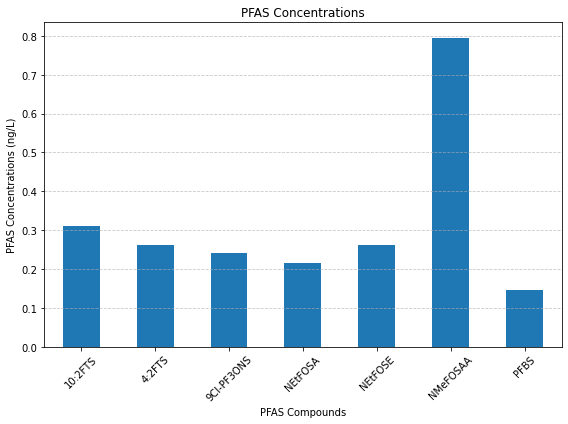

In [58]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
#Note: Please prepare a sheet in your Excel file with the subset of data. Please follow exact format as the orginal database.
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/ConnieRdz/PFAS Database Sample.xlsx'
#Specify sheet name
sheet_name = 'Sheet2'
#sub_group_column (str, optional): The column to use for grouping the data into subcategories.
#Note: You may create sub groups by creating a new column in the Excel file and providing the column name below. For example, you may have sample 'Before outfall'/'After outfall'
sub_group_column=None
#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

value_column ='All (w BDL= MDL/2) Incl Qual Flags'
title = 'PFAS Concentrations'
ylabel = 'PFAS Concentrations (ng/L)'
xlabel='PFAS Compounds'
figsize = (8,6)

# Create a bar chart using 'PFAS Compound' as categories and 'All (w BDL= MDL/2) Incl Qual Flags' as values
create_grouped_bar_chart(data_df, PFAS_Attributes=df_PFAS_Attributes,value_column=value_column, title=title, ylabel=ylabel,
                        xlabel=xlabel, figsize=figsize)

### 5) Number of Samples per Year 

#### 5.1) Functions

In [59]:
def create_pivot_table(data_df, filter_pfas_compound=None):
    """
    Create a pivot table with customizable PFAS Compound filter using data from a DataFrame.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_pfas_compound (list of str, optional): List of PFAS Compound values to filter the data (default is None).

    Returns:
        pd.DataFrame: The pivot table.
    """
    try:
        # Filter the data based on the provided PFAS Compound values if filter_pfas_compound is not None
        if filter_pfas_compound:
            filtered_data = data_df[data_df['PFAS Compound'].isin(filter_pfas_compound)]
        else:
            filtered_data = data_df

        # Extract the year from 'Sampled Date' column and create a new 'Year' column
        filtered_data['Year'] = pd.to_datetime(filtered_data['Sampled Date']).dt.year

        # Create a pivot table with 'Year' as index, 'Type' as columns, and sum of values as values
        pivot_table = pd.pivot_table(filtered_data, values='All (w BDL= MDL/2) Incl Qual Flags', index='Year', columns='Type', aggfunc='count', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [60]:
def create_stacked_bar_chart(pivot_table, title=None, ylabel=None):
    """
    Create a stacked bar chart using a pivot table with years as x-labels and counts for each Type as stacked bars.

    Args:
        pivot_table (pd.DataFrame): The pivot table containing counts for each year and Type.
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.

    Returns:
        None: Displays the stacked bar chart.
    """
    try:
        # Create a stacked bar chart
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
        pivot_table.plot(kind='bar', stacked=True, rot=0)
        plt.xlabel('Year')
        plt.ylabel(ylabel or 'Sample Count')
        plt.title(title or 'Stacked Bar Chart of Sample Counts by Year and Type')
        plt.legend(title='Type')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

#### 5.2) Import Data

In [63]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()


,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


#### 5.3) Create Pivot Table

In [64]:
# Example - How to create a pivot table for number of sampler each year
#Specify filter_pfas_compound (list of str, optional): List of PFAS Compound values to filter the data (default is None).
filter_pfas_compound = ['Perfluorohexadecanoic acid','Perfluorohexanesulfonic acid','Perfluorohexanoic acid']

# Create a pivot table with or without the PFAS Compound filter
pivot_table = create_pivot_table(data_df, filter_pfas_compound)
pivot_table

<ipython-input-59-be9639f461c0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = pd.to_datetime(filtered_data['Sampled Date']).dt.year


Type,Ambient,Biosolids,Blank,Effluent,Groundwater,Influent,Manhole,Outfall of Industry,Porewater,Soils
Year,,,,,,,,,,
2019,0,6,24,12,0,15,30,45,0,24
2020,0,12,39,24,0,42,258,12,0,0
2021,0,6,9,6,0,12,108,39,0,0
2022,0,12,84,21,0,24,0,153,3,114
2023,42,24,214,40,36,40,54,114,0,227


#### 5.3) Create Bar Chart for Number of Samples per Year

<Figure size 720x432 with 0 Axes>

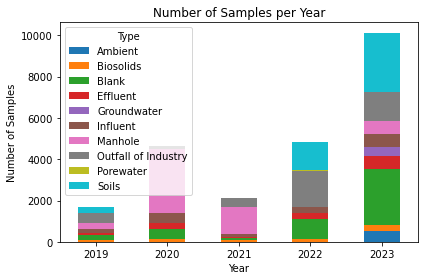

In [65]:
# Example usage: Create a stack bar shart for number of samples per year

# The function expect a pivot table. Please use the create_pivot_table function from 
# the previous example.
pivot_table = create_pivot_table(data_df, filter_pfas_compound=None)

#Specify a title (str, optional): The title for the chart.
title='Number of Samples per Year'
#Specify a ylabel (str, optional): The label for the y-axis.
ylabel='Number of Samples'

# Create a stacked bar chart with custom title and y-axis label
create_stacked_bar_chart(pivot_table, title=title, ylabel=ylabel)


### 6) Compare PFAS Concentrations and Composition at Various Sites

#### 6.1) Functions

In [66]:
def PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Location', columns='PFAS Compound', aggfunc='mean', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [67]:
def PivotTable_CountPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Location', columns='PFAS Compound', aggfunc='count', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [68]:
def create_std_dev_pivot_table_with_filters(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                                            filter_sample_location=None, start_date=None, end_date=None):
    """
    Create a custom pivot table with multiple filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'. Calculates the standard deviation of the average.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom standard deviation pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and standard deviation of the average as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Location', columns='PFAS Compound',
                                     aggfunc=lambda x: np.std(x, ddof=1), fill_value=None)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [69]:
def create_stacked_bar_chart(avg_pivot_table, std_dev_pivot_table=None, figsize=(10, 6)):
    """
    Create a stacked bar chart based on average PFAS concentrations pivot table with one bar per sample location.

    Args:
        avg_pivot_table (pd.DataFrame): The average PFAS concentrations pivot table.
        std_dev_pivot_table (pd.DataFrame, optional): The standard deviation pivot table (default is None).
        figsize (tuple, optional): Figure size (width, height) in inches (default is (10, 6)).

    Returns:
        None (displays the chart).
    """
    try:
        # Align the rows of avg_pivot_table and std_dev_pivot_table based on Sample Locations
        if std_dev_pivot_table is not None:
            merged_tables = avg_pivot_table.join(std_dev_pivot_table, how='left', rsuffix='_std_dev')
        else:
            merged_tables = avg_pivot_table

        categories = merged_tables.index
        compounds = avg_pivot_table.columns
        num_categories = len(categories)

        # Create the stacked bar chart with specified figsize
        fig, ax = plt.subplots(figsize=figsize)

        width = 0.35
        x = np.arange(num_categories)

        bottom = np.zeros(num_categories)

        for i, compound in enumerate(compounds):
            avg_values = merged_tables[compound]
            error_bars = merged_tables[f"{compound}_std_dev"] if std_dev_pivot_table is not None else None

            if error_bars is not None and not error_bars.isnull().all():
                ax.bar(x, avg_values, width, label=compound, bottom=bottom, yerr=error_bars, capsize=5)
            else:
                ax.bar(x, avg_values, width, label=compound, bottom=bottom)

            bottom += avg_values

        ax.set_xlabel('Sample Location')
        ax.set_ylabel('Average Concentration (ng/L)')
        ax.set_title('Average PFAS Concentrations by Sample Location')
        ax.set_xticks(x)
        ax.set_xticklabels(categories)
        ax.legend(title='PFAS Compound')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


#### 6.2) Import Data to use for this section.

In [34]:
# Import data for this section examples.

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()

KeyboardInterrupt: 

#### 6.3) Create Pivot Table for Average PFAS Compound Concentrations at Various Sites

In [70]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

# Specify data_df (pd.DataFrame): The DataFrame containing the data.
data_df=data_df

# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound=['HFPO-DA','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',
                      'Perfluoroheptanesulfonic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid',
                      'Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)',
                      'Perfluorooctanoic acid (PFOA)','Perfluoropentanesulfonic acid','Perfluoropentanoic acid']

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Durham Effluent','Fanno at Durham Rd','Rock @ Brookwood','Thomas Dairy B-2 Pore Water','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2022-01-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-12-30'

avg_pivot_table = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date)
avg_pivot_table

PFAS Compound,HFPO-DA,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluorodecanoic acid,Perfluoroheptanesulfonic acid,Perfluoroheptanoic acid,Perfluorohexanesulfonic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid
Sample Location,,,,,,,,,,,,,,
Durham Effluent,0.000000,5.625000,4.000000,0.182500,0.000000,0.500000,0.900000,10.950000,0.225000,0.000000,4.450000,6.650000,0.000000,8.650000
Fanno at Durham Rd,0.000000,5.600000,4.100000,1.300000,0.000000,2.900000,5.000000,5.900000,1.100000,0.380000,14.000000,7.300000,0.580000,6.200000
Rock @ Brookwood,0.000000,4.900000,4.400000,0.960000,0.000000,2.100000,3.300000,5.000000,0.940000,0.370000,9.700000,5.000000,0.380000,5.900000
Thomas Dairy B-2 Pore Water,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,5.300000,16.000000,0.000000,15.000000,21.000000,9.400000,0.000000,9.700000
Thomas Dairy Control Site Well,0.000000,5.766667,5.300000,0.000000,0.083333,1.320000,9.933333,5.133333,0.216667,0.096667,4.466667,5.600000,0.960000,4.630000
Thomas Dairy Site 1 Well,0.223333,3.550000,4.700000,0.133333,0.000000,0.693333,5.233333,1.766667,0.283333,0.203333,5.900000,3.766667,0.600000,1.800000
Thomas Dairy Site 2 Well,0.000000,3.866667,5.133333,0.000000,0.000000,0.000000,6.266667,0.433333,0.146667,0.120000,4.933333,2.400000,0.733333,0.426667
Thomas Dairy Site 3 Well,0.000000,4.433333,4.766667,0.000000,0.000000,1.633333,6.566667,4.966667,0.143333,0.000000,3.400000,6.433333,0.720000,6.233333


#### 6.4) Create Pivot Table for Count of PFAS Compound Concentrations at Various Sites

In [71]:
# Example usage with filters: Create pivot table for count of PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

# Specify data_df (pd.DataFrame): The DataFrame containing the data.
data_df=data_df

# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound=['HFPO-DA','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',
                      'Perfluoroheptanesulfonic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid',
                      'Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)',
                      'Perfluorooctanoic acid (PFOA)','Perfluoropentanesulfonic acid','Perfluoropentanoic acid']

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Durham Effluent','Fanno at Durham Rd','Rock @ Brookwood','Thomas Dairy B-2 Pore Water','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2022-01-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-12-30'

count_pivot_table = PivotTable_CountPFASCompound_FilterByCompoundSamplingDatesLocation(data_df,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date)
count_pivot_table

PFAS Compound,HFPO-DA,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluorodecanoic acid,Perfluoroheptanesulfonic acid,Perfluoroheptanoic acid,Perfluorohexanesulfonic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid
Sample Location,,,,,,,,,,,,,,
Durham Effluent,4,5,5,5,5,5,5,5,5,5,5,5,5,5
Fanno at Durham Rd,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Rock @ Brookwood,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Thomas Dairy B-2 Pore Water,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Thomas Dairy Control Site Well,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Site 1 Well,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Site 2 Well,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Site 3 Well,3,3,3,3,3,3,3,3,3,3,3,3,3,3


#### 6.5) Create Pivot Table with Sampling Standard Deviation for Each Compount at Each Site

In [72]:
# Specify data_df (pd.DataFrame): The DataFrame containing the data.
data_df=data_df

# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound=['HFPO-DA','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',
                      'Perfluoroheptanesulfonic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid',
                      'Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)',
                      'Perfluorooctanoic acid (PFOA)','Perfluoropentanesulfonic acid','Perfluoropentanoic acid']

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Durham Effluent','Fanno at Durham Rd','Rock @ Brookwood','Thomas Dairy B-2 Pore Water','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2022-01-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-12-30'
# Create a custom standard deviation pivot table with multiple filters
std_dev_pivot_table = create_std_dev_pivot_table_with_filters(data_df,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date)
std_dev_pivot_table


PFAS Compound,HFPO-DA,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluorodecanoic acid,Perfluoroheptanesulfonic acid,Perfluoroheptanoic acid,Perfluorohexanesulfonic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid
Sample Location,,,,,,,,,,,,,,
Durham Effluent,0.000000,2.904307,4.604346,0.326466,0.000000,0.894427,1.103177,5.443620,0.402492,0.000000,3.461647,3.183080,0.000000,4.535085
Thomas Dairy Control Site Well,0.000000,3.106981,3.477068,0.000000,0.144338,0.919348,1.847521,4.579665,0.192959,0.167432,1.234234,3.983717,0.069282,3.252799
Thomas Dairy Site 1 Well,0.386825,0.665833,1.732051,0.230940,0.000000,0.160728,0.808290,0.585947,0.136504,0.176730,1.819341,1.266228,0.040000,0.346410
Thomas Dairy Site 2 Well,0.000000,1.350309,1.250333,0.000000,0.000000,0.000000,0.808290,0.750555,0.127410,0.207846,1.011599,0.529150,0.151438,0.127410
Thomas Dairy Site 3 Well,0.000000,0.862168,0.665833,0.000000,0.000000,0.288675,1.001665,0.832666,0.125033,0.692820,0.871780,0.665833,0.141774,0.907377


#### 6.6) Stacked Bar Chart with Error Bars

c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\

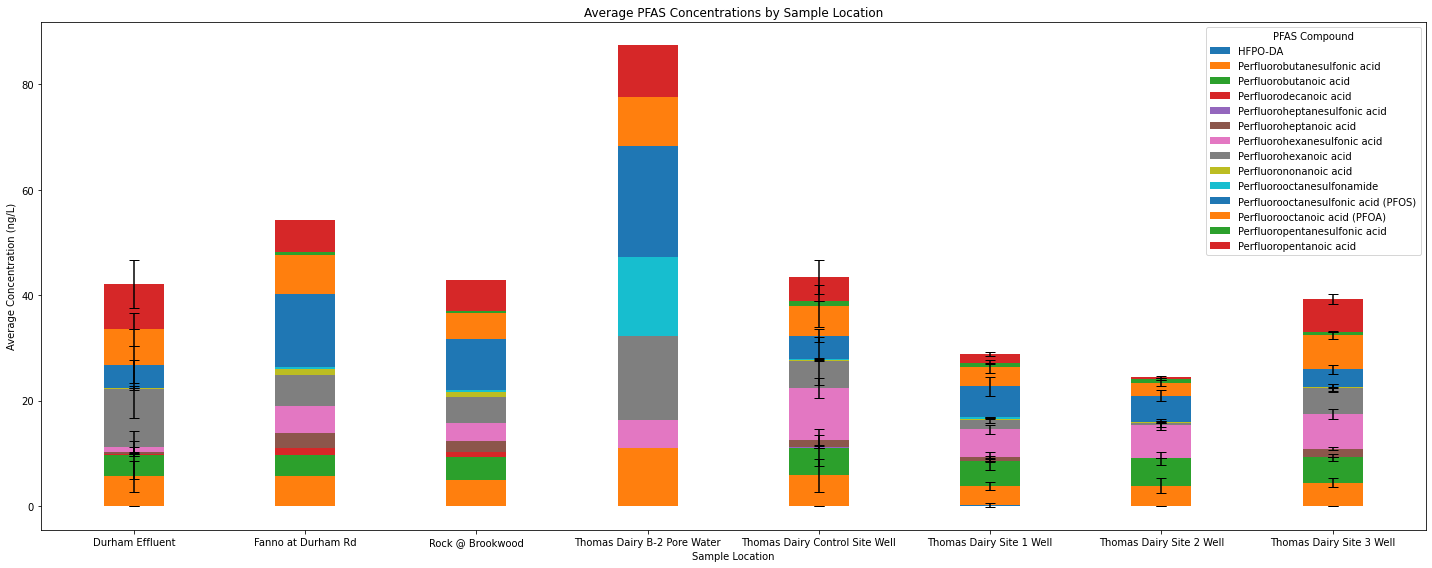

In [73]:
# Example: Create the stacked bar chart with custom figsize and error bars

#avg_pivot_table (pd.DataFrame): The average PFAS concentrations pivot table.
#std_dev_pivot_table (pd.DataFrame, optional): The standard deviation pivot table (default is None).
#figsize (tuple, optional): Figure size (width, height) in inches (default is (10, 6)).

create_stacked_bar_chart(avg_pivot_table, std_dev_pivot_table, figsize=(20, 8))  # Adjust figsize as needed


### 7) Create Pivot Table for Average Concentration of each PFAS Compounds Samples Taken Each Day

#### 7.1) Create Function

In [67]:
def create_custom_pivot_table(data_df, filter_qual_summary=None, start_date=None, end_date=None, filter_pfas_compounds=None, filter_sample_location=None):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'Sample Location',
    'Sample Date', 'PFAS Compounds', and 'Sample Location'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).
        filter_pfas_compounds (list of str, optional): List of 'PFAS Compounds' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).

    Returns:
        pd.DataFrame: The custom pivot table with average values.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Apply filters based on 'PFAS Compounds'
        if filter_pfas_compounds:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compounds)]

        # Apply filter based on 'Sample Location'
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Create a pivot table with 'Sample Date' as columns, 'PFAS Compound' as rows, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='PFAS Compound', columns='Sample Date',
                                     aggfunc='mean', fill_value='N/A')

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

#### 7.2) Import Data to use for this section.

In [104]:
# Import data for this section examples.

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()

,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


#### 7.3) Usage Example: Create Pivot Table Averaging PFAS Concentrations for PFAS Compound, Grouping by Sampling Date

In [68]:
# Usage example

# Filter criteria
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
#start_date (str, optional): Start date for the date range filter (default is None).
start_date ='2019-01-01'
#end_date (str, optional): End date for the date range filter (default is None).
end_date ='2020-12-30'
#filter_pfas_compounds (list of str, optional): List of 'PFAS Compounds' values to filter the data (default is None).
#filter_pfas_compounds =
# filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Durham Influent']

# Create the custom pivot table
custom_pivot_table = create_custom_pivot_table(data_df, filter_qual_summary, start_date=start_date, end_date=end_date,filter_sample_location=filter_sample_location)

# Display the custom pivot table
custom_pivot_table

Sample Date,2019-08-22,2019-11-04,2020-01-23,2020-04-23,2020-06-12,2020-09-23,2020-12-10
PFAS Compound,,,,,,,
10:2Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11Cl-PF3OUdS,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4:2 Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6:2 Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8:2 Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9Cl-PF3ONS,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADONA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HFPO-DA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEtFOSA,N/A,N/A,0.0,0.0,0.0,0.0,0.0


### 8) TOP Assay Results Pivot Table and Bar Chart for PFAS Compounds Pre and Post at Various Locations

#### 8.1) Import data for section

In [6]:
# Import data for this section examples.

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()

,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


#### 8.2) Flourine Concentrations at Various Sites (using Average of All (w BDL= MDL/2) Incl Qual Flags)

##### 8.2.1) Create Function for Pivot Table

In [46]:
def create_custom_pivot_table_with_filters(data_df, filter_qual_summary=None, start_date=None, end_date=None, filter_type=None, filter_sample_location=None, filter_pfas_compound=None, column_name='All (w BDL= MDL/2) Incl Qual Flags'):
    """
    Create a custom pivot table with filters based on multiple columns and calculate the average specified column
    for each PFAS Compound at each Sample Location.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        column_name (str, optional): Name of the column to calculate the average (default is 'All (w BDL= MDL/2) Incl Qual Flags').

    Returns:
        pd.DataFrame: The custom pivot table with average specified column values.
    """
    try:
        # Apply filters based on multiple columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Sample Location' as columns, 'PFAS Compound' as rows, and average specified column as values
        pivot_table = pd.pivot_table(filtered_data, values=column_name,
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc='mean', fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

   


##### 8.2.2) Example usage: Create Pivot Table for Average Concentrations of Various PFAS Compounds and Different Sites

In [48]:
# Filter criteria
        
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
#start_date (str, optional): Start date for the date range filter (default is None).
start_date = '2023-04-06'
#end_date (str, optional): End date for the date range filter (default is None).
end_date = '2023-06-07'
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Effluent','Influent']
#filter_pfas_compounds (list of str, optional): List of 'PFAS Compounds' values to filter the data (default is None).
filter_pfas_compounds = None
#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location = None
#column_name (str, optional): Name of the column to calculate the average (default is 'All (w BDL= MDL/2) Incl Qual Flags' other options are 
# 'Average of Quant Incl Estimates Incl Qual Flags','Average of Quant Only Incl Qual Flags').
column_name='All (w BDL= MDL/2) Incl Qual Flags'
# Create the custom pivot table with sample location filter
custom_pivot_table = create_custom_pivot_table_with_filters(data_df, filter_qual_summary, start_date, end_date,filter_type, filter_pfas_compounds, filter_sample_location,column_name)

# Display the custom pivot table
custom_pivot_table


Sample Location,Durham Effluent,Durham Influent,Forest Grove Effluent,Forest Grove Influent,Hillsboro Effluent,Hillsboro Influent,Rock Creek Effluent,Rock Creek Influent
PFAS Compound,,,,,,,,
10:2Fluorotelomersulfonic acid,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
11Cl-PF3OUdS,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50
4:2 Fluorotelomersulfonic acid,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50
8:2 Fluorotelomersulfonic acid,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
9Cl-PF3ONS,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50
...,...,...,...,...,...,...,...,...
TOP-Perfluoropentanesulfonic acid,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25
TOP-Perfluoropentanoic acid,11.00,18.00,12.00,28.00,10.00,23.00,12.00,30.00
TOP-Perfluorotetradecanoic acid,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25


##### 8.2.3) Create Functions for Table for Getting Flourine Equivalents and Concentrations in  mol/L

In [9]:
def find_fluorine_equivalents(PFAS_List, df_PFAS_Attributes):
    """
    Find the '% Fluorine Equivalents' value for each PFAS Compound in PFAS_List.

    Args:
        PFAS_List (list of str): List of PFAS Compounds to find '% Fluorine Equivalents' for.
        df_PFAS_Attributes (pd.DataFrame): DataFrame containing PFAS attributes including 'Database', 'Longest Carbon Chain Length', and '% Fluorine Equivalents'.

    Returns:
        dict: A dictionary mapping PFAS Compounds to their '% Fluorine Equivalents' values.
    """
    fluorine_equivalents_dict = {}

    for compound_name in PFAS_List:
        # Find the row where 'Database' matches the compound_name
        row = df_PFAS_Attributes[df_PFAS_Attributes['Database'] == compound_name]

        if not row.empty:
            # Access the 18th column (position 17) using .iloc[]
            fluorine_equivalents_value = row.iloc[0, 17]
            fluorine_equivalents_dict[compound_name] = fluorine_equivalents_value
        else:
            # If no match is found, set the value to None
            fluorine_equivalents_dict[compound_name] = None

    return fluorine_equivalents_dict


In [10]:
def create_pfas_compound_table_with_sample_location(PFAS_List, sample_locations, df_PFAS_Attributes, pivot_table):
    """
    Create a table with PFAS Compounds as rows, lookup 'Longest Carbon Chain Length' and 'Abbreviation' values from df_PFAS_attributes,
    and populate 'Sample Location Pre-TOP' and 'Sample Location Post-TOP' columns based on pivot_table.

    Args:
        PFAS_List (list of str): List of PFAS Compounds to include in the table.
        sample_locations (list of str): List of Sample Locations.
        df_PFAS_Attributes (pd.DataFrame): DataFrame containing PFAS attributes including 'Database', 'Longest Carbon Chain Length', and 'Abbrev'.
        pivot_table (pd.DataFrame): The pivot table containing values for PFAS Compounds and Sample Locations.

    Returns:
        pd.DataFrame: The table with PFAS Compounds as rows, 'Longest Carbon Chain Length', 'Abbreviation',
        and columns for Sample Locations with suffixes "Pre-TOP" and "Post-TOP" populated.
    """
    try:
        # Filter df_PFAS_attributes based on PFAS_List
        filtered_attributes = df_PFAS_Attributes[df_PFAS_Attributes['Database'].isin(PFAS_List)]

        # Create the table with PFAS Compounds as rows, 'Longest Carbon Chain Length', 'Abbreviation', and columns for Sample Locations
        compound_table = pd.DataFrame({
            'PFAS Compound': filtered_attributes['Database'],
            'Longest Carbon Chain Length': filtered_attributes['Longest Carbon Chain Length'],
            'Abbreviation': filtered_attributes['Abbrev']
        })

        # Iterate through Sample Locations and fill 'Sample Location Pre-TOP' columns based on pivot_table
        for location in sample_locations:
            # Modify this line to include the multiplication and division for Pre-TOP
            compound_table[f'{location} Pre-TOP'] = compound_table['PFAS Compound'].apply(
                lambda x: (pivot_table.at[x, location] if x in pivot_table.index else None) *
                           find_fluorine_equivalents([x], df_PFAS_Attributes)[x] / 19
            )

            # Modify this line to include the multiplication and division for Post-TOP
            compound_table[f'{location} Post-TOP'] = compound_table['PFAS Compound'].apply(
                lambda x: (pivot_table.at[f'TOP-{x}', location] if f'TOP-{x}' in pivot_table.index else None) *
                           find_fluorine_equivalents([x], df_PFAS_Attributes)[x] / 19
            )

        return compound_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



##### 8.2.4) Example Usage: Create Flourine Concentrations Table

In [25]:

PFAS_List= ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluoropentanoic acid','Perfluorohexanoic acid','Perfluoroheptanoic acid',
            'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluorononanoic acid']

sample_locations = ['Forest Grove Influent','Forest Grove Effluent','Rock Creek Influent','Rock Creek Influent','Rock Creek Effluent',
                    'Durham Influent','Durham Effluent']
pivot_table_pre_top=custom_pivot_table

FlourineEquiv_molL=create_pfas_compound_table_with_sample_location(PFAS_List, sample_locations, df_PFAS_Attributes, pivot_table_pre_top)
FlourineEquiv_molL

,PFAS Compound,Longest Carbon Chain Length,Abbreviation,Forest Grove Influent Pre-TOP,Forest Grove Influent Post-TOP,Forest Grove Effluent Pre-TOP,Forest Grove Effluent Post-TOP,Rock Creek Influent Pre-TOP,Rock Creek Influent Post-TOP,Rock Creek Effluent Pre-TOP,Rock Creek Effluent Post-TOP,Durham Influent Pre-TOP,Durham Influent Post-TOP,Durham Effluent Pre-TOP,Durham Effluent Post-TOP
19,Perfluorobutanesulfonic acid,4.0,PFBS,0.230923,0.185938,0.218927,0.146951,0.206931,0.143952,0.155948,0.101966,0.227924,0.188937,0.218927,0.143952
20,Perfluorobutanoic acid,4.0,PFBA,0.327057,0.621408,0.327057,0.425174,0.327057,0.883054,0.327057,1.046582,0.327057,0.588703,0.327057,0.588703
26,Perfluoroheptanoic acid,7.0,PFHpA,0.089271,0.349942,0.089271,0.089271,0.089271,0.335659,0.089271,0.124979,0.089271,0.214250,0.089271,0.114267
29,Perfluorohexanoic acid,6.0,PFHxA,0.157618,0.560420,0.595447,0.560420,0.157618,0.455342,0.350263,0.385289,0.157618,0.420315,0.346760,0.490368
31,Perfluorononanoic acid,9.0,PFNA,0.091579,0.098905,0.091579,0.045790,0.091579,0.106232,0.091579,0.045790,0.091579,0.098905,0.091579,0.045790
34,Perfluorooctanesulfonic acid (PFOS),8.0,PFOS,0.169956,0.207346,0.169956,0.084978,0.169956,0.237938,0.407894,0.275328,0.373903,0.883770,0.169956,0.268530
35,Perfluorooctanoic acid (PFOA),8.0,PFOA,0.090564,0.307919,0.090564,0.228222,0.188374,NaN,0.210109,NaN,0.293429,NaN,0.282561,NaN
37,Perfluoropentanoic acid,5.0,PFPeA,0.085211,0.954365,0.184056,0.409013,0.221549,1.022534,0.259042,0.409013,0.238591,0.613520,0.228366,0.374929


##### 8.2.5) Create Function for Bar Chart of Flourince Concentrations in mol/L 

In [23]:
def create_stacked_bar_chart(compound_table, sample_locations):
    """
    Create a stacked bar chart from the compound_table DataFrame.

    Args:
        compound_table (pd.DataFrame): DataFrame containing PFAS compound data.
        sample_locations (list of str): List of sample locations without suffixes.

    Returns:
        None (displays the plot).
    """
    # Initialize an empty DataFrame to store the data for plotting
    plot_data = pd.DataFrame()

    # Set the 'Abbreviation' column as the index for the legend
    compound_table.set_index('Abbreviation', inplace=True)
    
    # Iterate through sample locations and create stacked bars
    for location in sample_locations:
        # Select columns ending with ' Pre-TOP' and ' Post-TOP' for the current location
        pre_top_column = f'{location} Pre-TOP'
        post_top_column = f'{location} Post-TOP'

        # Combine ' Pre-TOP' and ' Post-TOP' columns into one DataFrame
        location_data = compound_table[[pre_top_column, post_top_column]]

        # Transpose and rename columns to remove suffixes
        location_data = location_data.transpose()
        location_data.columns = [str(col).replace(' Pre-TOP', '').replace(' Post-TOP', '') for col in location_data.columns]

        # Append the data for the current location to the plot_data DataFrame
        plot_data = pd.concat([plot_data, location_data])


    # Create a stacked bar chart
    plot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Set plot labels and title
    plt.xlabel('Sample Locations')
    plt.ylabel('Flourine Concentrations (mol/L)')
    plt.title('Flourine Concentrations at Sample Pre and Post Sample Locations')

    # Show the plot with the 'Abbreviation' column as the legend
    plt.legend(title='Abbreviation', loc='best')
    plt.tight_layout()
    plt.show()


    

##### 8.2.6) Example: Create Flourince Concentrations at Various Location Bar Chart

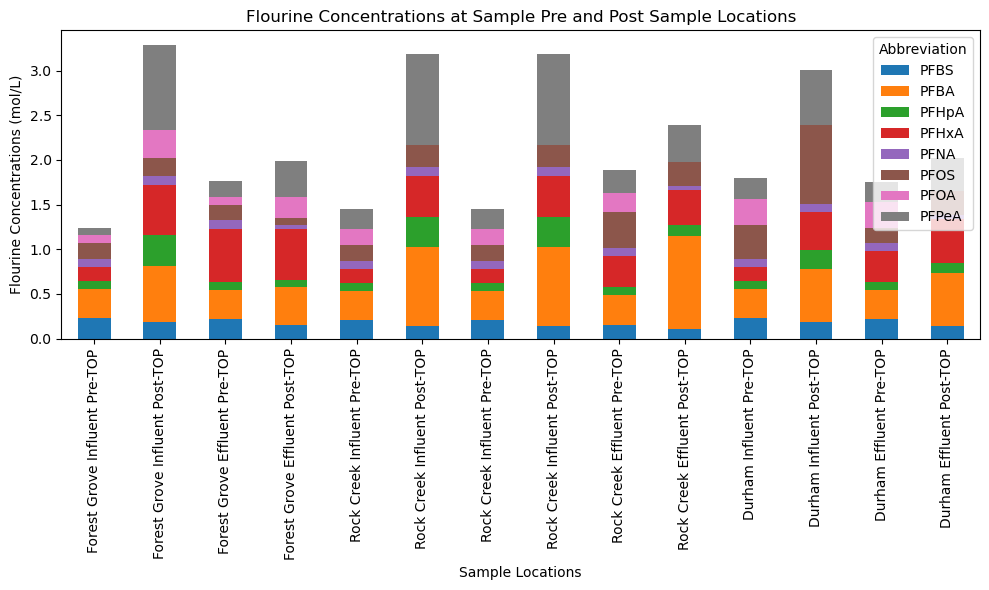

In [26]:
# Note: you may need to recreate the FlourineEquiv_molL table  from the last section if running into an error. 
#This will happen if you try to run this function twice.
sample_locations = ['Forest Grove Influent','Forest Grove Effluent','Rock Creek Influent','Rock Creek Influent','Rock Creek Effluent',
                    'Durham Influent','Durham Effluent']
compound_table=FlourineEquiv_molL

create_stacked_bar_chart(compound_table, sample_locations)

#### 8.3) PFAS Concentrations (ng/L) at Various Sites

##### 8.3.1) Create function for Avg PFAS Concentrations at Various Sites

In [31]:
def create_custom_pivot_table_with_filters(data_df, filter_qual_summary=None, start_date=None, end_date=None, filter_type=None, filter_sample_location=None, filter_pfas_compound=None, column_name='All (w BDL= MDL/2) Incl Qual Flags'):
    """
    Create a custom pivot table with filters based on multiple columns and calculate the average specified column
    for each PFAS Compound at each Sample Location.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        column_name (str, optional): Name of the column to calculate the average (default is 'All (w BDL= MDL/2) Incl Qual Flags').

    Returns:
        pd.DataFrame: The custom pivot table with average specified column values.
    """
    try:
        # Apply filters based on multiple columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Sample Location' as columns, 'PFAS Compound' as rows, and average specified column as values
        pivot_table = pd.pivot_table(filtered_data, values=column_name,
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc='mean', fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

   

##### 8.3.2) Example: Create table for Avf PFAS Concentrations at Various Sites

In [30]:
# Filter criteria
        
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
#start_date (str, optional): Start date for the date range filter (default is None).
start_date = '2023-04-06'
#end_date (str, optional): End date for the date range filter (default is None).
end_date = '2023-06-07'
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Effluent','Influent']
#filter_pfas_compounds (list of str, optional): List of 'PFAS Compounds' values to filter the data (default is None).
filter_pfas_compounds = None
#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location = None

# Create the custom pivot table with sample location filter
custom_pivot_table = create_custom_pivot_table_with_filters(data_df, filter_qual_summary, start_date, end_date,filter_type, filter_pfas_compounds, filter_sample_location)

# Display the custom pivot table
custom_pivot_table

Sample Location,Durham Effluent,Durham Influent,Forest Grove Effluent,Forest Grove Influent,Hillsboro Effluent,Hillsboro Influent,Rock Creek Effluent,Rock Creek Influent
PFAS Compound,,,,,,,,
10:2Fluorotelomersulfonic acid,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
11Cl-PF3OUdS,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50
4:2 Fluorotelomersulfonic acid,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50
8:2 Fluorotelomersulfonic acid,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
9Cl-PF3ONS,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50
...,...,...,...,...,...,...,...,...
TOP-Perfluoropentanesulfonic acid,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25
TOP-Perfluoropentanoic acid,11.00,18.00,12.00,28.00,10.00,23.00,12.00,30.00
TOP-Perfluorotetradecanoic acid,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25


##### 8.3.3) Create Function for Avg PFAS Concentrations at Various Sites Pre and Post Table

In [28]:
def create_pfas_compound_table_with_sample_location(PFAS_List, sample_locations, df_PFAS_Attributes, pivot_table):
    """
    Create a table with PFAS Compounds as rows, lookup 'Longest Carbon Chain Length' and 'Abbreviation' values from df_PFAS_attributes,
    and populate 'Sample Location Pre-TOP' and 'Sample Location Post-TOP' columns based on pivot_table.

    Args:
        PFAS_List (list of str): List of PFAS Compounds to include in the table.
        sample_locations (list of str): List of Sample Locations.
        df_PFAS_Attributes (pd.DataFrame): DataFrame containing PFAS attributes including 'Database', 'Longest Carbon Chain Length', and 'Abbrev'.
        pivot_table (pd.DataFrame): The pivot table containing values for PFAS Compounds and Sample Locations.

    Returns:
        pd.DataFrame: The table with PFAS Compounds as rows, 'Longest Carbon Chain Length', 'Abbreviation',
        and columns for Sample Locations with suffixes "Pre-TOP" and "Post-TOP" populated.
    """
    try:
        # Filter df_PFAS_attributes based on PFAS_List
        filtered_attributes = df_PFAS_Attributes[df_PFAS_Attributes['Database'].isin(PFAS_List)]

        # Create the table with PFAS Compounds as rows, 'Longest Carbon Chain Length', 'Abbreviation', and columns for Sample Locations
        compound_table = pd.DataFrame({
            'PFAS Compound': filtered_attributes['Database'],
            'Longest Carbon Chain Length': filtered_attributes['Longest Carbon Chain Length'],
            'Abbreviation': filtered_attributes['Abbrev']
        })

        # Iterate through Sample Locations and fill 'Sample Location Pre-TOP' columns based on pivot_table
        for location in sample_locations:
            # Modify this line to include the multiplication and division for Pre-TOP
            compound_table[f'{location} Pre-TOP'] = compound_table['PFAS Compound'].apply(
                lambda x: (pivot_table.at[x, location] if x in pivot_table.index else None) 
            )

            # Modify this line to include the multiplication and division for Post-TOP
            compound_table[f'{location} Post-TOP'] = compound_table['PFAS Compound'].apply(
                lambda x: (pivot_table.at[f'TOP-{x}', location] if f'TOP-{x}' in pivot_table.index else None)
            )

        return compound_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


##### 8.3.4) Example: Create Function for Avg PFAS Concentrations at Various Sites Pre and Post Table

In [29]:
PFAS_List= ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluoropentanoic acid','Perfluorohexanoic acid','Perfluoroheptanoic acid',
            'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluorononanoic acid']

sample_locations = ['Forest Grove Influent','Forest Grove Effluent','Rock Creek Influent','Rock Creek Influent','Rock Creek Effluent',
                    'Durham Influent','Durham Effluent']
pivot_table_pre_top=custom_pivot_table

create_pfas_compound_table_with_sample_location(PFAS_List, sample_locations, df_PFAS_Attributes, pivot_table_pre_top)


,PFAS Compound,Longest Carbon Chain Length,Abbreviation,Forest Grove Influent Pre-TOP,Forest Grove Influent Post-TOP,Forest Grove Effluent Pre-TOP,Forest Grove Effluent Post-TOP,Rock Creek Influent Pre-TOP,Rock Creek Influent Post-TOP,Rock Creek Effluent Pre-TOP,Rock Creek Effluent Post-TOP,Durham Influent Pre-TOP,Durham Influent Post-TOP,Durham Effluent Pre-TOP,Durham Effluent Post-TOP
19,Perfluorobutanesulfonic acid,4.0,PFBS,7.7,6.2,7.3,4.90,6.9,4.8,5.2,3.40,7.6,6.3,7.3,4.80
20,Perfluorobutanoic acid,4.0,PFBA,10.0,19.0,10.0,13.00,10.0,27.0,10.0,32.00,10.0,18.0,10.0,18.00
26,Perfluoroheptanoic acid,7.0,PFHpA,2.5,9.8,2.5,2.50,2.5,9.4,2.5,3.50,2.5,6.0,2.5,3.20
29,Perfluorohexanoic acid,6.0,PFHxA,4.5,16.0,17.0,16.00,4.5,13.0,10.0,11.00,4.5,12.0,9.9,14.00
31,Perfluorononanoic acid,9.0,PFNA,2.5,2.7,2.5,1.25,2.5,2.9,2.5,1.25,2.5,2.7,2.5,1.25
34,Perfluorooctanesulfonic acid (PFOS),8.0,PFOS,5.0,6.1,5.0,2.50,5.0,7.0,12.0,8.10,11.0,26.0,5.0,7.90
35,Perfluorooctanoic acid (PFOA),8.0,PFOA,2.5,8.5,2.5,6.30,5.2,NaN,5.8,NaN,8.1,NaN,7.8,NaN
37,Perfluoropentanoic acid,5.0,PFPeA,2.5,28.0,5.4,12.00,6.5,30.0,7.6,12.00,7.0,18.0,6.7,11.00


##### 8.3.5) Create function for Creating Bar Chart of PFAS Concentrations Pre and Post Sites

In [44]:
def create_stacked_bar_chart(compound_table, sample_locations):
    """
    Create a stacked bar chart from the compound_table DataFrame.

    Args:
        compound_table (pd.DataFrame): DataFrame containing PFAS compound data.
        sample_locations (list of str): List of sample locations without suffixes.

    Returns:
        None (displays the plot).
    """
    # Initialize an empty DataFrame to store the data for plotting
    plot_data = pd.DataFrame()

    # Set the 'Abbreviation' column as the index for the legend
    compound_table.set_index('Abbreviation', inplace=True)
    
    # Iterate through sample locations and create stacked bars
    for location in sample_locations:
        # Select columns ending with ' Pre-TOP' and ' Post-TOP' for the current location
        pre_top_column = f'{location} Pre-TOP'
        post_top_column = f'{location} Post-TOP'

        # Combine ' Pre-TOP' and ' Post-TOP' columns into one DataFrame
        location_data = compound_table[[pre_top_column, post_top_column]]

        # Transpose and rename columns to remove suffixes
        location_data = location_data.transpose()
        location_data.columns = [str(col).replace(' Pre-TOP', '').replace(' Post-TOP', '') for col in location_data.columns]

        # Append the data for the current location to the plot_data DataFrame
        plot_data = pd.concat([plot_data, location_data])


    # Create a stacked bar chart
    plot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Set plot labels and title
    plt.xlabel('Sample Locations')
    plt.ylabel('PFAS Concentrations (ng/L)')
    plt.title('PFAS Concentrations at Sample Pre and Post Sample Locations')

    # Show the plot with the 'Abbreviation' column as the legend
    plt.legend(title='Abbreviation', loc='best')
    plt.tight_layout()
    plt.show()

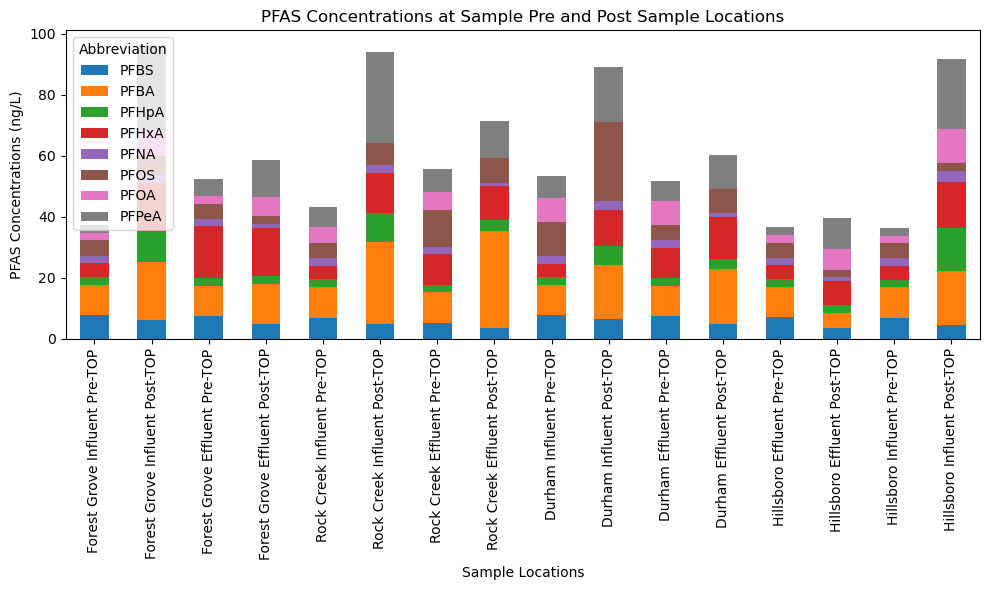

In [45]:

sample_locations = ['Forest Grove Influent','Forest Grove Effluent','Rock Creek Influent','Rock Creek Influent','Rock Creek Effluent',
                    'Durham Influent','Durham Effluent']

PFAS_List= ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluoropentanoic acid','Perfluorohexanoic acid','Perfluoroheptanoic acid',
            'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluorononanoic acid']

sample_locations = ['Forest Grove Influent','Forest Grove Effluent','Rock Creek Influent','Rock Creek Effluent',
                    'Durham Influent','Durham Effluent', 'Hillsboro Effluent', 'Hillsboro Influent']

pivot_table_pre_top=custom_pivot_table

compound_table=create_pfas_compound_table_with_sample_location(PFAS_List, sample_locations, df_PFAS_Attributes, pivot_table_pre_top)

create_stacked_bar_chart(compound_table, sample_locations)

### 9) Avg PFAS Concentrations at Various Sites on Multiple Sampling Dates

#### 9.1) Functions

In [36]:
def create_filtered_pivot_table(data_df, sample_location=None, qual_summary=None, type=None, pfas_compound=None):
    """
    Create a filtered pivot table with customizable filters and aggregation.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        type (list of str, optional): List of 'Type' values to filter the data (default is None).
        pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).

    Returns:
        pd.DataFrame: The pivot table with 'PFAS Compound' as columns, 'Sample Date' as rows, and average 'Quant Incl Estimates Incl Qual Flags' as values.
    """
    try:
        # Apply filters based on specified conditions
        filtered_data = data_df
        if sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(sample_location)]

        if qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(qual_summary)]

        if type:
            filtered_data = filtered_data[filtered_data['Type'].isin(type)]
        
        if pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(pfas_compound)]

        # Create a pivot table with 'Sample Date' as rows, 'PFAS Compound' as columns, and average 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Date', columns='PFAS Compound',
                                     aggfunc='mean', fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [121]:
def create_stacked_bar_chart(pivot_table, title=None, figsize=(12, 6), legend_height=-0.4, pfas_attributes=None):
    """
    Create a stacked bar chart from a pivot table.

    Args:
        pivot_table (pd.DataFrame): The pivot table with 'Sample Date' as rows and PFAS compounds as columns.
        title (str, optional): The title for the chart.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.
        legend_height (float, optional): The second bbox_to_anchor value for adjusting the legend height.
        pfas_attributes (pd.DataFrame, optional): The DataFrame containing PFAS attributes with 'Database' and 'Abbrev' columns.

    Returns:
        None (displays the plot).
    """
    try:
        # Change the datetime format of the index (Sample Date) to MM/DD/YYYY
        pivot_table.index = pivot_table.index.strftime('%m/%d/%Y')

        # Replace column names with abbreviated names from PFAS_Attributes
        if pfas_attributes is not None:
            # Create a dictionary mapping 'Database' values to 'Abbrev' values
            pfas_mapping = dict(zip(pfas_attributes['Database'], pfas_attributes['Abbrev']))
            pivot_table.rename(columns=pfas_mapping, inplace=True)

        # Create a stacked bar chart with custom figure size
        ax = pivot_table.plot(kind='bar', stacked=True, figsize=figsize)

        # Set plot labels and title
        plt.xlabel('Sample Date')
        plt.ylabel('PFAS Concentration (ng/L)')
        plt.title(title or 'Stacked Bar Chart of PFAS Compounds by Sample Date')

        # Show the legend outside the plot at the bottom center with adjustable height
        plt.legend(title='PFAS Compound', loc='upper center', bbox_to_anchor=(0.5, legend_height), ncol=5)

        # Show the plot
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


#### 9.2) Create Pivot Table for PFAS Concentrations (avg) at various sites on multiple sampling dates

In [122]:
# sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
sample_location = ['Intel Ronler WATR']
# qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
qual_summary = ['Good','Probably Ok','']
# type (list of str, optional): List of 'Type' values to filter the data (default is None).
type = ['Outfall of Industry']
# pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
pfas_compound = ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorobutanoic acid','Perfluoroheptanoic acid','Perfluorohexanoic acid',
                 'Perfluorononanoic acid','Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid']

pivot_table_Intel = create_filtered_pivot_table(data_df, sample_location=sample_location, qual_summary=qual_summary, type=type,pfas_compound=pfas_compound)
pivot_table_Intel

PFAS Compound,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluoroheptanoic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanoic acid
Sample Date,,,,,,,,
2019-08-15,190.00,170.0,24.00,61.0,8.5,15.0,16.0,94.0
2022-04-13,NaN,0.0,0.61,NaN,0.0,0.0,0.0,2.2
2023-01-26,0.78,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2023-04-07,2.90,0.0,0.60,1.4,0.0,0.0,0.0,1.1
2023-09-11,NaN,3.3,0.00,0.0,0.0,NaN,NaN,NaN


In [123]:
# sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
sample_location = ['Hillsboro Landfill']
# qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
qual_summary = ['Good','Probably Ok','']
# type (list of str, optional): List of 'Type' values to filter the data (default is None).
type = ['Outfall of Industry']
# pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
pfas_compound = ['Perfluorobutanesulfonic acid','Perfluorodecanoic acid','Perfluorobutanoic acid','Perfluorobutanoic acid','Perfluoroheptanoic acid','Perfluorohexanoic acid',
                 'Perfluorononanoic acid','Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid']

pivot_table_Hillsboro = create_filtered_pivot_table(data_df, sample_location=sample_location, qual_summary=qual_summary, type=type,pfas_compound=pfas_compound)
pivot_table_Hillsboro

PFAS Compound,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluorodecanoic acid,Perfluoroheptanoic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanoic acid
Sample Date,,,,,,,,,
2019-08-15,5200,2600,62,750,5100,50.0,240,1300,1700
2022-04-13,4000,2800,110,590,4700,NaN,150,1200,3800
2022-08-04,3400,3100,140,750,4500,100.0,1900,1400,2700
2023-01-26,3400,2100,250,820,4000,180.0,350,2000,2300
2023-04-07,870,2600,37,680,2200,73.0,1900,1400,1100
2023-09-11,930,2300,34,760,2000,75.0,1100,1300,1200


#### 9.3) Create Stacked Bar Chart for Avg PFAS Concentrations for a Single Location Over Various Sampling Dates

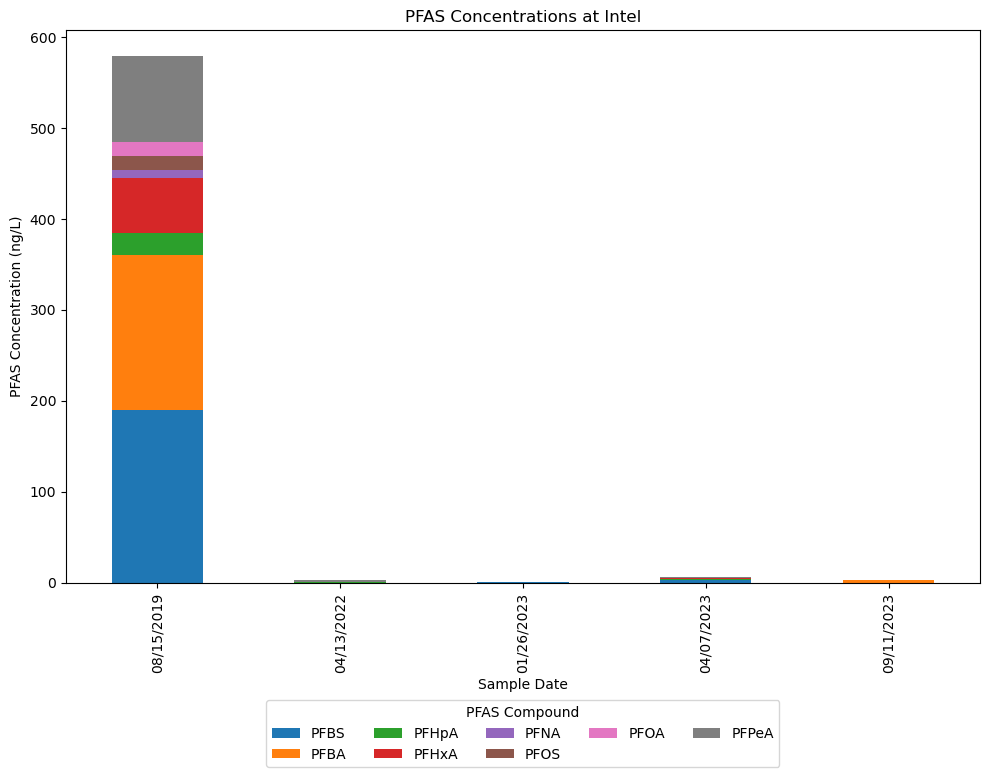

In [124]:
create_stacked_bar_chart(pivot_table=pivot_table_Intel, title = 'PFAS Concentrations at Intel',figsize=(10,8),legend_height=-0.2, pfas_attributes=df_PFAS_Attributes)

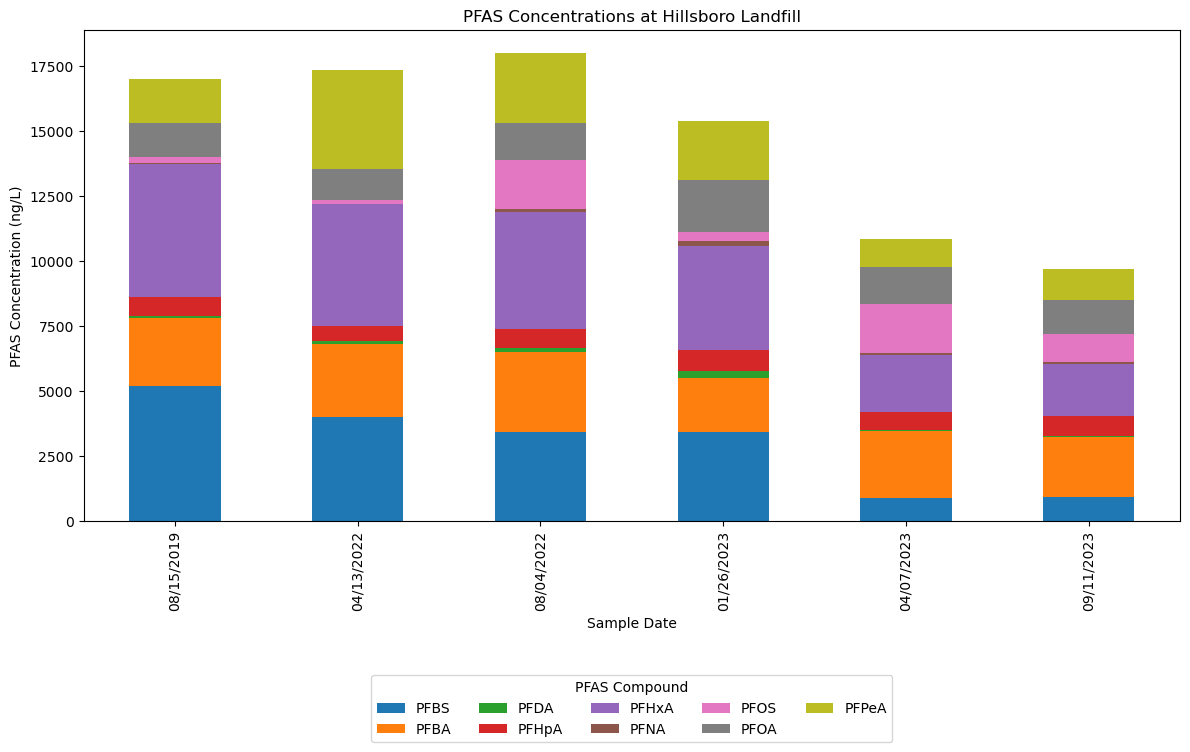

In [125]:
create_stacked_bar_chart(pivot_table=pivot_table_Hillsboro, title = 'PFAS Concentrations at Hillsboro Landfill',figsize=(12, 8),legend_height=-0.3,pfas_attributes=df_PFAS_Attributes)

### 10) Effects of TOP Assay on Influent vs EFfluent

#### 10.1) Functions

In [10]:
def create_custom_pivot_table_with_filters(data_df, filter_qual_summary=None, start_date=None, end_date=None, filter_type=None, filter_sample_location=None, filter_pfas_compound=None, column_name='All (w BDL= MDL/2)', column_prefix=None):
    """
    Create a custom pivot table with filters based on multiple columns and calculate the average specified column
    for each PFAS Compound at each Sample Location.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        column_name (str, optional): Name of the column to calculate the average (default is 'All (w BDL= MDL/2)').
        column_prefix (str, optional): Prefix to add to the pivot table column names (default is None).

    Returns:
        pd.DataFrame: The custom pivot table with average specified column values.
    """
    try:
        # Apply filters based on multiple columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Sample Location' as columns, 'PFAS Compound' as rows, and average specified column as values
        pivot_table = pd.pivot_table(filtered_data, values=column_name,
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc='mean', fill_value=np.nan)

        # Add prefix to column names if specified
        if column_prefix:
            pivot_table.columns = [f"{column_prefix}{col}" for col in pivot_table.columns]

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [13]:
def merge_pivot_tables(table1, table2):
    """
    Merge two pivot tables based on row names, considering the 'TOP-' part in the second table.

    Args:
        table1 (pd.DataFrame): The first pivot table to be merged.
        table2 (pd.DataFrame): The second pivot table to be merged.

    Returns:
        pd.DataFrame: The merged pivot table.
    """
    # Create copies of the input tables to avoid modifying the originals
    merged_table1 = table1.copy()
    merged_table2 = table2.copy()

    # Remove 'TOP-' from the row names in the second table
    merged_table2.index = merged_table2.index.str.replace('TOP-', '')

    # Merge the two tables based on row names
    merged_table = pd.concat([merged_table1, merged_table2], axis=1)

    return merged_table


In [14]:
def calculate_increase_from_precursors(pivot_table, filter_sample_locations):
    """
    Calculate the increase from precursors for each Sample Location in a pivot table.

    Args:
        pivot_table (pd.DataFrame): The pivot table containing PFAS data.
        filter_sample_locations (list of str): List of Sample Locations to calculate increases for.

    Returns:
        pd.DataFrame: The pivot table with columns for increase from precursors.
    """
    try:
        result_table = pivot_table.copy()

        for location in filter_sample_locations:
            original_column = location
            digested_column = f"Digested {location}"
            increase_column = f"Increase from Precursor for {location}"

            # Calculate the increase from precursors by subtracting digested values from original values
            result_table[increase_column] = result_table[original_column] - result_table[digested_column]

        return result_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [15]:
def create_stacked_bar_chart(data_df, title=None, ylabel=None, figsize=None):
    """
    Create a stacked bar chart from a DataFrame with values stacked for each column.

    Args:
        data_df (pd.DataFrame): The DataFrame containing data for the chart.
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.

    Returns:
        None: Displays the stacked bar chart.
    """
    try:
        # Filter columns to keep only those that do not start with 'Increase from Precursors'
        filtered_df = data_df.loc[:, ~data_df.columns.str.startswith('Increase from Precursor')]

        # Transpose the DataFrame to have columns as categories on the x-axis
        transposed_df = filtered_df.T

        # Create a stacked bar chart
        fig, ax = plt.subplots(figsize=figsize or (10, 6))
        transposed_df.plot(kind='bar', stacked=True, ax=ax)
        plt.xlabel('Sample Location')
        plt.ylabel(ylabel or 'PFAS Concentration (ng/L)')
        plt.title(title or 'Stacked Bar Chart of PFAS Compounds')

        # Set the legend outside the plot to the right
        ax.legend(title='PFAS Compound', bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")





#### 10.2) Create Pivot Table for Main and TOP Assay of PFAS Concentrations (Avg) at Influent and Effluent

In [16]:
# filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']

#start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-04-06'

#end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-04-07'

#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).

#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Durham Effluent','Durham Influent']

#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound=TOP_Assay

#column_name (str, optional): Name of the column to calculate the average (default is 'All (w BDL= MDL/2) Incl Qual Flags').
column_name='Quant Incl Estimates Incl Qual Flags'

AvgPFAS = create_custom_pivot_table_with_filters(data_df, filter_qual_summary=filter_qual_summary, start_date=start_date, end_date=end_date, filter_type=None, 
                                       filter_sample_location=filter_sample_location, filter_pfas_compound=Main_Assay, column_name=column_name)

AvgPFAS


Sample Location,Durham Effluent,Durham Influent
PFAS Compound,,
Perfluorobutanesulfonic acid,7.3,7.6
Perfluorobutanoic acid,0.0,0.0
Perfluoroheptanoic acid,0.0,0.0
Perfluorohexanesulfonic acid,0.0,0.0
Perfluorohexanoic acid,9.9,0.0
Perfluorononanoic acid,0.0,0.0
Perfluorooctanesulfonic acid (PFOS),0.0,11.0
Perfluoropentanoic acid,6.7,7.0
Perfluorotridecanoic acid,0.0,0.0


In [17]:
# filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']

#start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-04-06'

#end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-04-07'

#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).

#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Durham Effluent','Durham Influent']

#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound=TOP_Assay

#column_name (str, optional): Name of the column to calculate the average (default is 'All (w BDL= MDL/2) Incl Qual Flags').
column_name='Quant Incl Estimates Incl Qual Flags'

#column_prefix (str, optional): Prefix to add to the pivot table column names (default is None).
column_prefix = 'Digested '

Digested_AvgPFAS = create_custom_pivot_table_with_filters(data_df, filter_qual_summary=filter_qual_summary, start_date=start_date, end_date=end_date, filter_type=None, 
                                       filter_sample_location=filter_sample_location, filter_pfas_compound=TOP_Assay, column_name=column_name,column_prefix=column_prefix)
Digested_AvgPFAS

,Digested Durham Effluent,Digested Durham Influent
PFAS Compound,,
TOP-Perfluorobutanesulfonic acid,4.8,6.3
TOP-Perfluorobutanoic acid,18.0,18.0
TOP-Perfluoroheptanoic acid,3.2,6.0
TOP-Perfluorohexanesulfonic acid,0.0,3.7
TOP-Perfluorohexanoic acid,14.0,12.0
TOP-Perfluorononanoic acid,0.0,2.7
TOP-Perfluorooctanesulfonic acid (PFOS),7.9,26.0
TOP-Perfluoropentanoic acid,11.0,18.0
TOP-Perfluorotridecanoic acid,0.0,2.6


#### 10.3) Merge Avg PFAS Concentration and Digested Concentrations Tables & Calculate Increase from Precursor

In [35]:
#filter_sample_locations (list of str): List of Sample Locations to calculate increases for.
filter_sample_locations=['Durham Effluent','Durham Influent']

#Input the two tables to be merged together
pivot_table=merge_pivot_tables(AvgPFAS, Digested_AvgPFAS)
table = calculate_increase_from_precursors(pivot_table=pivot_table, filter_sample_locations=filter_sample_locations)
table

,Durham Effluent,Durham Influent,Digested Durham Effluent,Digested Durham Influent,Increase from Precursor for Durham Effluent,Increase from Precursor for Durham Influent
PFAS Compound,,,,,,
Perfluorobutanesulfonic acid,7.3,7.6,4.8,6.3,2.5,1.3
Perfluorobutanoic acid,0.0,0.0,18.0,18.0,-18.0,-18.0
Perfluoroheptanoic acid,0.0,0.0,3.2,6.0,-3.2,-6.0
Perfluorohexanesulfonic acid,0.0,0.0,0.0,3.7,0.0,-3.7
Perfluorohexanoic acid,9.9,0.0,14.0,12.0,-4.1,-12.0
Perfluorononanoic acid,0.0,0.0,0.0,2.7,0.0,-2.7
Perfluorooctanesulfonic acid (PFOS),0.0,11.0,7.9,26.0,-7.9,-15.0
Perfluoropentanoic acid,6.7,7.0,11.0,18.0,-4.3,-11.0
Perfluorotridecanoic acid,0.0,0.0,0.0,2.6,0.0,-2.6


#### 10.4) Create Stacked Bar Chart for Avg PFAS Concentrations

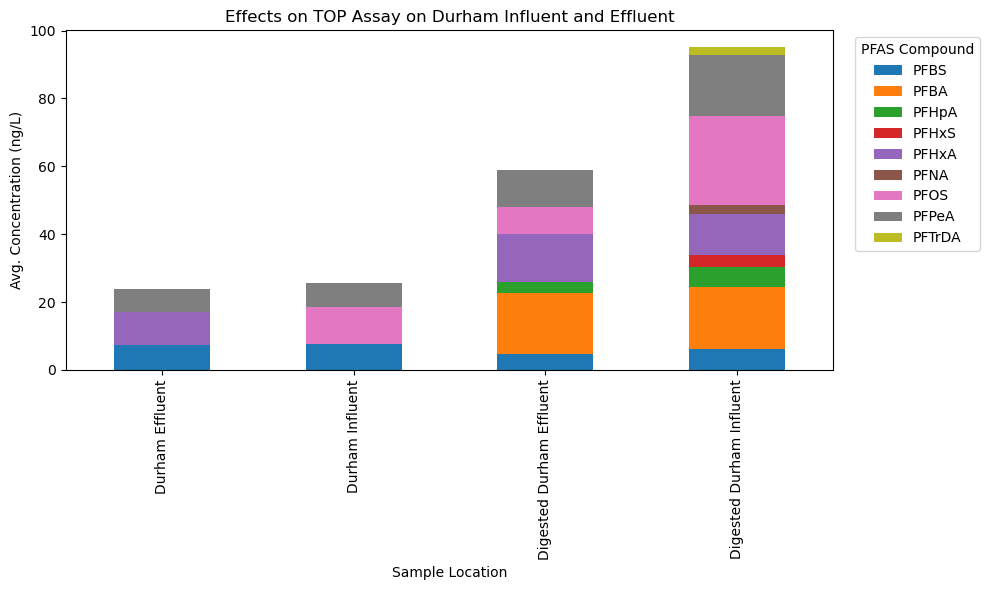

In [38]:
data_df = table

# Assume df_PFAS_Attributes is your DataFrame containing PFAS attributes
# And data_df is your DataFrame with PFAS compounds as the index

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
data_df.index = data_df.index.map(pfas_mapping)

create_stacked_bar_chart(data_df, title='Effects on TOP Assay on Durham Influent and Effluent', ylabel='Avg. Concentration (ng/L)', figsize=None)

### 11)Avg PFAS Concentration over Time (Line chart, no done yet)


#### 11.1) Functions

In [75]:
def create_pivot_table(data_df, filter_type=None, filter_sample_location=None, filter_pfas_compound=None):
    """
    Create a pivot table with filtering options based on 'Type,' 'Sample Location,' and 'PFAS Compound.'

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).

    Returns:
        pd.DataFrame: The pivot table with rows as 'Sample Date,' columns as 'Sample Location,' and values as
        the average 'Quant Incl Estimates Incl Qual Flags.'
    """
    try:
        # Apply filters based on multiple columns
        filtered_data = data_df
        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Sample Date' as rows, 'Sample Location' as columns, and average 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Date', columns='Sample Location',
                                     aggfunc='mean', fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [82]:
def create_line_chart_from_pivot(pivot_table, ylabel=None):
    """
    Create a line chart with data markers for each column in the pivot table against the 'Sample Date.'

    Args:
        pivot_table (pd.DataFrame): The pivot table containing data to plot.
        ylabel (str, optional): The label for the y-axis (default is None).

    Returns:
        None: Displays the line chart with data markers and legends.
    """
    try:
        # Create a line chart with data markers for each column in the pivot table
        fig, ax = plt.subplots(figsize=(12, 6))
        for col in pivot_table.columns:
            plt.plot(pivot_table.index, pivot_table[col], label=col, marker='o', markersize=5)

        # Set labels and title
        plt.xlabel('Sample Date')
        plt.ylabel(ylabel or 'Avg PFAS Concentration (ng/L)')
        plt.title('Line Chart of PFAS Concentrations Over Time')

        # Add a legend
        plt.legend()

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


#### 11.2) Import Data for Section

In [44]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()

,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


#### 11.3) Create Pivot Table Average Single PFAS Compound Concentration at Multiple Sites

In [79]:
#data_df (pd.DataFrame): The DataFrame containing the data.

# filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Durham Influent','MH#10840','MH#16149','MH#17032','MH#52519','MH#52520','MH#52521','MH#87535']
# qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
#qual_summary=

#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Influent','Manhole','Outfall of Industry']
# 
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound = ['Perfluorooctanoic acid (PFOA)']

pivot_table = create_pivot_table(data_df, filter_type=filter_type, filter_sample_location=filter_sample_location, filter_pfas_compound=filter_pfas_compound)
pivot_table

Sample Location,Durham Influent,MH#10840,MH#16149,MH#17032,MH#52519,MH#52520,MH#52521,MH#87535
Sample Date,,,,,,,,
2019-08-22,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-04,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,20.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-23,280.0,310.0,NaN,320.0,NaN,NaN,NaN,NaN
2020-06-12,110.0,74.0,NaN,1000.0,24.0,NaN,870.0,1200.0
2020-08-07,NaN,NaN,NaN,420.0,NaN,1100.0,NaN,1100.0
2020-09-23,11.0,13.0,NaN,NaN,NaN,NaN,NaN,470.0
2020-12-10,7.6,8.8,29.0,NaN,NaN,NaN,70.0,17.0


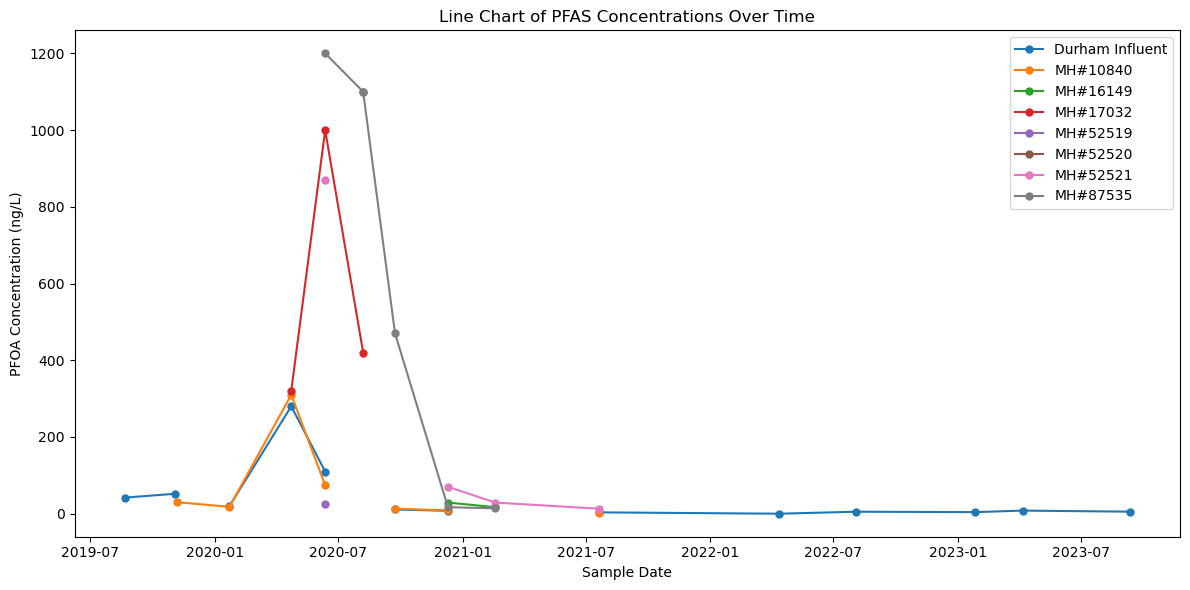

In [84]:
create_line_chart_from_pivot(pivot_table, ylabel='PFOA Concentration (ng/L)')

### 12) Average PFAS Compounds Concentrations for Various Sample Types and Error

#### 12.1) Functions

In [14]:
def create_pivot_table_from_dataframe(data_df, filter_qual_summary=None, filter_sample_location=None, filter_type=None, filter_pfas_compound=None, aggfunc='mean'):
    """
    Create a pivot table from a given DataFrame with specified filters and calculate the specified aggregation function
    for each PFAS Compound and Type.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
            Supported values: 'mean', 'count', 'std' (standard deviation), 'sum', 'min', 'max', 'median'.

    Returns:
        pd.DataFrame: The pivot table with specified aggregation function applied to the values.
    """
    try:
        # Apply filters based on specified columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Type' as columns, 'PFAS Compound' as rows, and specified aggregation function as values
        pivot_table = pd.pivot_table(filtered_data, values='All (w BDL= MDL/2) Incl Qual Flags',
                                     index='PFAS Compound', columns='Type',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [15]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [34]:
def create_grouped_bar_chart_with_errors(avg_pivot_table, error_pivot_table, title=None, ylabel=None, figsize=None):
    """
    Create a grouped bar chart from a pivot table with rows as groups and columns as subgroups, including error bars.

    Args:
        avg_pivot_table (pd.DataFrame): The pivot table containing average data.
        error_pivot_table (pd.DataFrame): The pivot table containing error data (standard deviations).
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.

    Returns:
        None: Displays the grouped bar chart with error bars.
    """
    try:
        # Create a grouped bar chart with error bars
        fig, ax = plt.subplots(figsize=figsize or (10, 6))
        subgroups = avg_pivot_table.columns
        group_indices = range(len(avg_pivot_table))
        bar_width = 0.2  # Width of each bar within a group

        for i, subgroup in enumerate(subgroups):
            x = [index + i * bar_width for index in group_indices]
            avg_values = avg_pivot_table[subgroup]
            error_values = error_pivot_table[subgroup]

            plt.bar(x, avg_values, width=bar_width, label=subgroup, yerr=error_values, capsize=5)

        # Customize the chart labels and legend
        plt.xlabel('PFAS Compounds')
        plt.ylabel(ylabel or 'Average Concentration')
        plt.title(title or 'Grouped Bar Chart of Average Concentrations with Error Bars')

        # Set the legend outside the plot to the right
        ax.legend(title='Sample Type', bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.xticks([index + (len(subgroups) - 1) * bar_width / 2 for index in group_indices], avg_pivot_table.index)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

#### 12.2) Create Pivot Table for Avg Concentrations

In [24]:
filter_qual_summary = ['Good','Probably Ok',' ']

#filter_sample_location=

filter_type = ['Biosolids','Effluent','Influent']

filter_pfas_compound = ['Perfluorobutanoic acid','Perfluorobutanesulfonic acid','Perfluoropentanoic acid','HFPO-DA','Perfluoropentanesulfonic acid']

Avg_Pivot =create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=None, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='mean')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
Avg_Pivot.index = Avg_Pivot.index.map(pfas_mapping)

Avg_Pivot

Type,Biosolids,Effluent,Influent
PFAS Compound,,,
HFPO-DA,1.845294,1.602258,2.584634
PFBS,1.096842,7.860152,8.344186
PFBA,2.147368,13.123529,13.411364
PFPeS,0.601579,0.952794,1.932727
PFPeA,0.551053,11.120588,9.478409


#### 12.3) Create Pivot Table for Standard Deviation

In [23]:
filter_qual_summary = ['Good','Probably Ok',' ']

#filter_sample_location=

filter_type = ['Biosolids','Effluent','Influent']

filter_pfas_compound = ['Perfluorobutanoic acid','Perfluorobutanesulfonic acid','Perfluoropentanoic acid','HFPO-DA','Perfluoropentanesulfonic acid']

std_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=None, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='std')


# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
std_Pivot.index = std_Pivot.index.map(pfas_mapping)

std_Pivot

Type,Biosolids,Effluent,Influent
PFAS Compound,,,
HFPO-DA,1.308769,1.852173,1.382543
PFBS,1.217703,8.065459,10.145884
PFBA,2.460774,12.155808,12.208084
PFPeS,0.598886,0.941339,0.745413
PFPeA,0.602236,7.345367,6.891454


#### 12.4) Create Pivot Table for Count of Samples

In [22]:
filter_qual_summary = ['Good','Probably Ok',' ']

#filter_sample_location=

filter_type = ['Biosolids','Effluent','Influent']

filter_pfas_compound = ['Perfluorobutanoic acid','Perfluorobutanesulfonic acid','Perfluoropentanoic acid','HFPO-DA','Perfluoropentanesulfonic acid']

count_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=None, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='count')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
count_Pivot.index = count_Pivot.index.map(pfas_mapping)

count_Pivot

Type,Biosolids,Effluent,Influent
PFAS Compound,,,
HFPO-DA,17,31,41
PFBS,19,33,43
PFBA,19,34,44
PFPeS,19,34,44
PFPeA,19,34,44


#### 12.5) Create Pivot Table for Sampling Error

In [21]:
average_pivot=Avg_Pivot
std_dev_pivot = std_Pivot
count_pivot=count_Pivot
error_Pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
error_Pivot.index = error_Pivot.index.map(pfas_mapping)

error_Pivot

Type,Biosolids,Effluent,Influent
PFAS Compound,,,
HFPO-DA,0.317423,0.332660,0.215917
PFBS,0.279360,1.404016,1.547233
PFBA,0.564540,2.084704,1.840438
PFPeS,0.137394,0.161438,0.112375
PFPeA,0.138162,1.259720,1.038926


#### 12.6) Create Bar Chart for Avg PFAS Concentrations Using Type as Subgroup

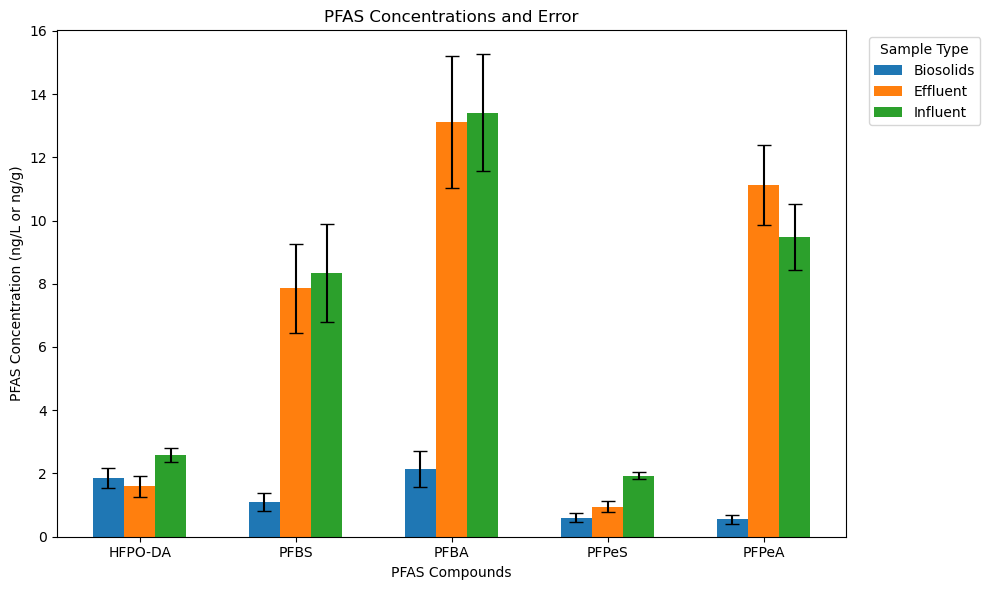

In [35]:
avg_pivot_table=Avg_Pivot
error_pivot_table=error_Pivot

create_grouped_bar_chart_with_errors(avg_pivot_table=avg_pivot_table, error_pivot_table=error_pivot_table, title='PFAS Concentrations and Error', ylabel='PFAS Concentration (ng/L or ng/g)', figsize=None)

### 13) All Data Records for Specific Sampling Location

#### 13.1) Functions

In [74]:
def create_custom_pivot_table(data_df, value_column='Quant Incl Estimates Incl Qual Flags', filter_qual_summary=None, start_date=None, end_date=None, filter_pfas_compounds=None, filter_sample_location=None):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'Sample Location',
    'Sample Date', 'PFAS Compounds', and 'Sample Location'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        value_column (str, optional): The column to use as pivot table values (default is 'Quant Incl Estimates Incl Qual Flags').
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).
        filter_pfas_compounds (list of str, optional): List of 'PFAS Compounds' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).

    Returns:
        pd.DataFrame: The custom pivot table with average values.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Apply filters based on 'PFAS Compounds'
        if filter_pfas_compounds:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compounds)]

        # Apply filter based on 'Sample Location'
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Create a pivot table with 'Sample Date' as columns, 'PFAS Compound' as rows, and specified value column as values
        pivot_table = pd.pivot_table(filtered_data, values=value_column,
                                     index='PFAS Compound', columns='Sample Date',
                                     aggfunc='mean', fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [75]:
def create_combined_pivot(Quat, QuatInc, MDL):
    # Create an empty DataFrame with the same structure as the input tables
    combined_pivot = pd.DataFrame(index=Quat.index, columns=Quat.columns)
    
    # Iterate through rows and columns
    for row in Quat.index:
        for col in Quat.columns:
            Quat_value = Quat.loc[row, col] if row in Quat.index and col in Quat.columns else np.nan
            QuatInc_value = QuatInc.loc[row, col] if row in QuatInc.index and col in QuatInc.columns else np.nan
            MDL_value = MDL.loc[row, col] if row in MDL.index and col in MDL.columns else np.nan
            
            # Check if the values are numeric
            if pd.notna(Quat_value):
                Quat_value = float(Quat_value)  # Convert to float
                QuatInc_value = float(QuatInc_value)  # Convert to float
                MDL_value = float(MDL_value)  # Convert to float
                
                if Quat_value > 0:
                    combined_pivot.loc[row, col] = str(Quat_value)
                elif QuatInc_value > 0:
                    combined_pivot.loc[row, col] = str(QuatInc_value) + " E"
                else:
                    combined_pivot.loc[row, col] = "< " + str(MDL_value)
            else:
                combined_pivot.loc[row, col] = ""
    
    return combined_pivot



#### 13.2 Pivot Table for Average of Quant Only Incl Qual Flags

In [76]:
#value_column (str, optional): The column to use as pivot table values (default is 'Quant Incl Estimates Incl Qual Flags').
value_column='Quant Only Incl Qual Flags'
# Filter criteria
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
# filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Jireh Semiconductor Inc']


quant_pivot=create_custom_pivot_table(data_df,value_column=value_column, filter_qual_summary=filter_qual_summary, start_date=None, end_date=None, filter_pfas_compounds=None, filter_sample_location=filter_sample_location)
quant_pivot

Sample Date,2022-04-13,2022-08-04,2023-01-26,2023-04-07,2023-09-11
PFAS Compound,,,,,
10:2Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0
11Cl-PF3OUdS,0.0,0.0,0.0,0.0,0.0
4:2 Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0
6:2 Fluorotelomersulfonic acid,0.0,NaN,0.0,0.0,0.0
8:2 Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0
9Cl-PF3ONS,0.0,0.0,0.0,0.0,0.0
ADONA,0.0,0.0,0.0,0.0,0.0
HFPO-DA,NaN,0.0,2.1,0.0,2.1
NEtFOSA,0.0,0.0,0.0,0.0,0.0


#### 13.3) Pivot Table for Quant Incl Estimates Incl Qual Flags

In [77]:
#value_column (str, optional): The column to use as pivot table values (default is 'Quant Incl Estimates Incl Qual Flags').
value_column='Quant Incl Estimates Incl Qual Flags'
# Filter criteria
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
# filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Jireh Semiconductor Inc']


QuatInc_Pivot = create_custom_pivot_table(data_df,value_column=value_column, filter_qual_summary=filter_qual_summary, start_date=None, end_date=None, filter_pfas_compounds=None, filter_sample_location=filter_sample_location)
QuatInc_Pivot

Sample Date,2022-04-13,2022-08-04,2023-01-26,2023-04-07,2023-09-11
PFAS Compound,,,,,
10:2Fluorotelomersulfonic acid,0.0,0.0,0.00,0.0,0.0
11Cl-PF3OUdS,0.0,0.0,0.00,0.0,0.0
4:2 Fluorotelomersulfonic acid,0.0,0.0,0.00,0.0,0.0
6:2 Fluorotelomersulfonic acid,0.0,NaN,0.00,0.0,0.0
8:2 Fluorotelomersulfonic acid,0.0,0.0,0.00,0.0,0.0
9Cl-PF3ONS,0.0,0.0,0.00,0.0,0.0
ADONA,0.0,0.0,0.00,0.0,0.0
HFPO-DA,NaN,0.0,2.10,1.8,2.1
NEtFOSA,0.0,0.0,0.00,0.0,0.0


#### 13.4) Pivot Table for Avg MDL

In [78]:
#value_column (str, optional): The column to use as pivot table values (default is 'Quant Incl Estimates Incl Qual Flags').
value_column='MDL'
# Filter criteria
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
# filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Jireh Semiconductor Inc']


MDL_Pivot=create_custom_pivot_table(data_df,value_column=value_column, filter_qual_summary=filter_qual_summary, start_date=None, end_date=None, filter_pfas_compounds=None, filter_sample_location=filter_sample_location)
MDL_Pivot

Sample Date,2022-04-13,2022-08-04,2023-01-26,2023-04-07,2023-09-11
PFAS Compound,,,,,
10:2Fluorotelomersulfonic acid,0.87,10.0,0.77,2.00,0.74
11Cl-PF3OUdS,0.44,5.0,0.48,1.30,0.47
4:2 Fluorotelomersulfonic acid,0.44,5.0,0.48,1.30,0.47
6:2 Fluorotelomersulfonic acid,1.70,NaN,0.48,1.30,0.47
8:2 Fluorotelomersulfonic acid,0.87,10.0,0.58,1.50,0.56
9Cl-PF3ONS,0.44,5.0,0.48,1.30,0.47
ADONA,0.44,5.0,0.48,1.30,0.47
HFPO-DA,NaN,10.0,NaN,NaN,NaN
NEtFOSA,0.87,10.0,0.38,1.00,0.37


#### 13.5 Data Compilation Table

In [79]:
# Call function and provide previous tables as inputs
PFAS_Results_Location = create_combined_pivot(Quat=quant_pivot, QuatInc=QuatInc_Pivot, MDL=MDL_Pivot)

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))

# Rename the index of data_df using the mapping (No need to change)
PFAS_Results_Location.index = PFAS_Results_Location.index.map(pfas_mapping)

PFAS_Results_Location

Sample Date,2022-04-13,2022-08-04,2023-01-26,2023-04-07,2023-09-11
PFAS Compound,,,,,
10:2FTS,< 0.87,< 10.0,< 0.77,< 2.0,< 0.74
11Cl-PF3OUdS,< 0.44,< 5.0,< 0.48,< 1.3,< 0.47
4:2FTS,< 0.44,< 5.0,< 0.48,< 1.3,< 0.47
6:2FTS,< 1.7,,< 0.48,< 1.3,< 0.47
8:2FTS,< 0.87,< 10.0,< 0.58,< 1.5,< 0.56
9Cl-PF3ONS,< 0.44,< 5.0,< 0.48,< 1.3,< 0.47
ADONA,< 0.44,< 5.0,< 0.48,< 1.3,< 0.47
HFPO-DA,,< 10.0,2.1,1.8 E,2.1
NEtFOSA,< 0.87,< 10.0,< 0.38,< 1.0,< 0.37


### 14) PFAS Concentrations by Industry Sectors

#### 14.1) Functions

In [104]:
def create_custom_pivot(data_df, filter_type=None, filter_qual_summary=None, filter_sector=None, filter_pfas_compound=None, accfunc='mean'):
    """
    Create a custom pivot table with filters based on 'Type', 'Qual Summary (Grade for filtering)',
    'Sector', and 'PFAS Compound', averaging 'Quant Incl Estimates Incl Qual Flags'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').

    Returns:
        pd.DataFrame: The custom pivot table with average values.
    """
    try:
        # Apply filters based on 'Type'
        filtered_data = data_df
        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        # Apply filters based on 'Qual Summary (Grade for filtering)'
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'Sector'
        if filter_sector:
            filtered_data = filtered_data[filtered_data['Sector'].isin(filter_sector)]

        # Apply filters based on 'PFAS Compound'
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'PFAS Compound' as rows, 'Sector' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='PFAS Compound', columns='Sector',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [108]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [138]:
def create_bar_chart(average_pivot, std_error_pivot, figsize=(12, 6), title=None, xlabel=None, ylabel=None):
    """
    Create a bar chart with grouped and stacked bars, legend, and error bars.

    Args:
        average_pivot (pd.DataFrame): Pivot table with averages, PFAS Compound as rows, and Sector as columns.
        std_error_pivot (pd.DataFrame): Pivot table with standard errors, PFAS Compound as rows, and Sector as columns.
        figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
        title (str, optional): Title for the chart. Default is None.
        xlabel (str, optional): Label for the x-axis. Default is None.
        ylabel (str, optional): Label for the y-axis. Default is None.
    """
    # Get the sectors and compounds from the pivot tables
    sectors = average_pivot.columns
    compounds = average_pivot.index

    # Set the width of the bars
    bar_width = 0.35

    # Initialize a figure and axis for the bar chart
    fig, ax = plt.subplots(figsize=figsize)

    # Create an index array for the x-axis positions
    x = np.arange(len(sectors))

    # Initialize a list to store the bottom values for stacked bars
    bottom = np.zeros(len(sectors))

    # Loop through each PFAS Compound
    for compound in compounds:
        # Get the average values for the compound
        averages = average_pivot.loc[compound]

        # Get the standard error values for the compound
        std_errors = std_error_pivot.loc[compound]

        # Create the bars for the compound, stacking on the previous bars
        bars = ax.bar(x, averages, bar_width, label=compound, yerr=std_errors, bottom=bottom, capsize=5)

        # Update the bottom values for the next compound
        bottom += averages

    # Set the x-axis labels to be the sectors
    ax.set_xticks(x)
    ax.set_xticklabels(sectors)

    # Set labels and title
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if title:
        ax.set_title(title)

    # Add a legend
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


#### 14.2) Create Pivot Table for Average PFAS Compounds Concentrations at Various Industry Sectors

In [123]:
#data_df (pd.DataFrame): The DataFrame containing the data.
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type=['Outfall of Industry']
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
#filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
filter_sector= ['Chemicals','Electrical and Electronic Components','Industrial Launderers','Metal Finishing','Paper Products','Rubber Manufacture']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= ['6:2 Fluorotelomersulfonic acid','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',
                       'Perfluorododecanoic acid','Perfluoroheptanoic acid','Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide',
                       'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid']
#aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
aggfunc = 'mean'

average_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound)
# Rename the index of data_df using the mapping (No need to change)
average_pivot.index = average_pivot.index.map(pfas_mapping)
average_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
6:2FTS,5.00,0.120000,5.525,18.716000,38.000000,23.250000
PFBS,0.00,31.638261,22.400,2.075217,1.520000,0.142500
PFBA,0.00,100.521739,0.540,7.811111,0.000000,58.025000
PFDA,0.00,5.098000,0.300,60.844828,0.000000,47.333333
PFDoA,0.00,1.092000,1.198,10.987000,0.000000,6.200000
PFHpA,0.95,20.620800,0.500,44.231667,4.133333,117.590000
PFHxA,2.27,36.482174,2.400,92.150000,5.900000,538.200000
PFNA,0.00,7.805200,1.360,40.675862,0.000000,23.400000
FOSA,0.55,0.531739,0.000,4.856207,0.000000,4.475000


#### 14.3) Create Pivot Table for Average Standard Deviation for PFAS Compounds Concentrations at Various Industry Sectors

In [124]:
#data_df (pd.DataFrame): The DataFrame containing the data.
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type=['Outfall of Industry']
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
#filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
filter_sector= ['Chemicals','Electrical and Electronic Components','Industrial Launderers','Metal Finishing','Paper Products','Rubber Manufacture']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= ['6:2 Fluorotelomersulfonic acid','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',
                       'Perfluorododecanoic acid','Perfluoroheptanoic acid','Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide',
                       'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid']
#aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
aggfunc = 'std'

std_dev_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound)
# Rename the index of data_df using the mapping (No need to change)
std_dev_pivot.index = std_dev_pivot.index.map(pfas_mapping)
std_dev_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
6:2FTS,7.071068,0.427381,6.037315,57.851028,12.165525,15.777093
PFBS,0.000000,59.640598,47.890751,5.189358,3.398823,0.285000
PFBA,0.000000,176.785934,1.207477,13.909746,0.000000,65.921184
PFDA,0.000000,8.561329,0.670820,241.874521,0.000000,29.021831
PFDoA,0.000000,1.887882,2.362842,39.026394,0.000000,3.619392
PFHpA,1.343503,34.541161,1.118034,111.899284,3.744774,84.452168
PFHxA,2.022325,57.292014,2.831078,209.653222,5.672742,492.393339
PFNA,0.000000,13.144855,1.293445,154.673392,0.000000,16.861198
FOSA,0.777817,1.412595,0.000000,8.924346,0.000000,5.831738


#### 14.4) Create Pivot Table for Count of PFAS Compounds Concentrations at Various Industry Sectors

In [125]:
#data_df (pd.DataFrame): The DataFrame containing the data.
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type=['Outfall of Industry']
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
#filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
filter_sector= ['Chemicals','Electrical and Electronic Components','Industrial Launderers','Metal Finishing','Paper Products','Rubber Manufacture']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= ['6:2 Fluorotelomersulfonic acid','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',
                       'Perfluorododecanoic acid','Perfluoroheptanoic acid','Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide',
                       'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid']
#aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
aggfunc = 'count'

count_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound)
# Rename the index of data_df using the mapping (No need to change)
count_pivot.index = count_pivot.index.map(pfas_mapping)
count_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
6:2FTS,2,23,4,25,3,4
PFBS,2,23,6,23,5,4
PFBA,2,23,5,27,4,4
PFDA,2,25,5,29,5,6
PFDoA,2,25,5,30,4,5
PFHpA,2,25,5,30,3,6
PFHxA,2,23,5,28,4,5
PFNA,2,25,5,29,4,5
FOSA,2,23,5,29,4,4


#### 14.4) Create Pivot Table for Standard Error of PFAS Compounds Concentrations at Various Industry Sectors

In [128]:
std_error_pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
std_error_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
6:2FTS,5.00,0.089115,3.018657,11.570206,7.023769,7.888547
PFBS,0.00,12.435924,19.551317,1.082056,1.520000,0.142500
PFBA,0.00,36.862415,0.540000,2.676932,0.000000,32.960592
PFDA,0.00,1.712266,0.300000,44.914971,0.000000,11.848113
PFDoA,0.00,0.377576,1.056695,7.125212,0.000000,1.618641
PFHpA,0.95,6.908232,0.500000,20.429921,2.162046,34.477453
PFHxA,1.43,11.946211,1.266096,39.620735,2.836371,220.204995
PFNA,0.00,2.628971,0.578446,28.722128,0.000000,7.540557
FOSA,0.55,0.294546,0.000000,1.657210,0.000000,2.915869


#### 14.5) Create Bar Chart for Average PFAS Concentrations at Various Industry Sectors Showing Standard Error

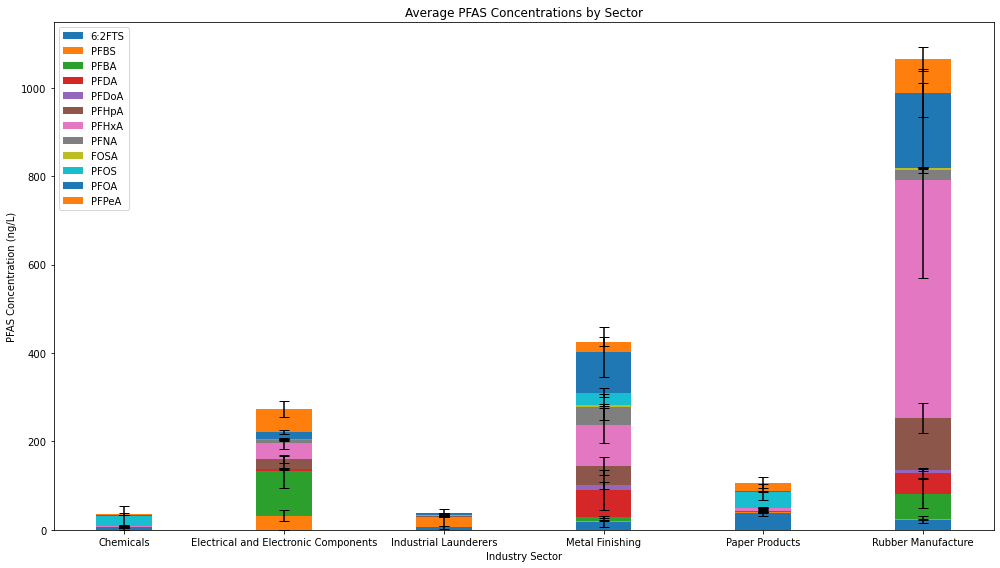

In [141]:
create_bar_chart(average_pivot, std_error_pivot, figsize=(14, 8), title='Average PFAS Concentrations by Sector', xlabel='Industry Sector', ylabel='PFAS Concentration (ng/L)')